In [14]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import DistanceMetric
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [15]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def euc_distance(self, a, b):
        return DistanceMetric.get_metric('euclidean').pairwise([a],[b])[0][0]

    def closest(self, row):
        dists = [self.euc_distance(row, item) for  item in self.X_train]
        nei = dists.index(min(dists))
        
        return self.y_train[nei]
    
    def k_closest(self, row, k):
        dists = [(index,self.euc_distance(row, item)) for index,item in enumerate(self.X_train)]
        dists.sort(key = lambda x: x[1])
        vizinhos = []
        for i in range(k):
            vizinhos.append(self.y_train[dists[i][0]])
        classe = Counter(vizinhos).most_common(1)[0][0]
        
        return classe
        
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels
        
        

    def predict(self, to_classify, k=3):
        predictions = []
        for row in to_classify:
            label = self.k_closest(row, k)
            predictions.append(label)
        return predictions

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv', index_col=0)

train_size = len(train)
test_size = len(test)

train.head()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
data = pd.concat([train, test])
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1.0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3.0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5.0,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6.0,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7.0,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8.0,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9.0,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10.0,2,female,1,1.0,237736


In [18]:
#data = data.where((pd.notnull(data)), 0)
data['Age'] = data.Age.fillna(data.Age.mean())
data = data.where((pd.notnull(data)), 0)
for f in ["Sex", "Embarked"]:
    data[f] = data[f].astype('category')
    data[f] = data[f].cat.codes

data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,0,3,7.2500,"Braund, Mr. Owen Harris",0,1.0,3,1,1,0.0,A/5 21171
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,1,1.0,PC 17599
2,26.0,0,3,7.9250,"Heikkinen, Miss. Laina",0,3.0,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,3,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,0,1,1.0,113803
4,35.0,0,3,8.0500,"Allen, Mr. William Henry",0,5.0,3,1,0,0.0,373450


In [19]:
train = data[:train_size]
test = data[train_size:]

In [20]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = train.get(features)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,3
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,3
3,1,0,35.000000,1,0,53.1000,3
4,3,1,35.000000,0,0,8.0500,3
5,3,1,29.881138,0,0,8.4583,2
6,1,1,54.000000,0,0,51.8625,3
7,3,1,2.000000,3,1,21.0750,3
8,3,0,27.000000,0,2,11.1333,3
9,2,0,14.000000,1,0,30.0708,1


In [21]:
y = train["Survived"].values

In [22]:
y

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [23]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
X_test = test.get(features)
y_test = test["Survived"].values

In [26]:
resultado = knn.predict(X_test)

In [27]:
accuracy_score(y_test, resultado)

0.64114832535885169

In [28]:
scores = []
ks = range(1,120, 4)
n_ks = len(ks)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    scores.append(knn.score(X_test,y_test))
    

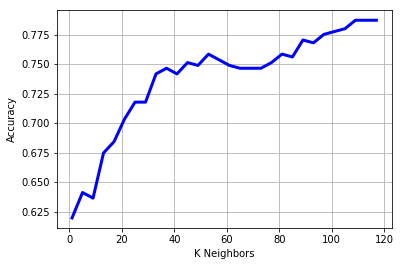

In [29]:
fig,ax = plt.subplots()
ax.plot(ks,scores,'b',linewidth=3)
ax.set_ylabel('Accuracy')
ax.set_xlabel('K Neighbors')

plt.grid()

In [30]:
max(scores)

0.78708133971291872

In [31]:
bestK = scores.index(max(scores))

bestK*4 +1

109

In [32]:
bestK = 109

In [33]:
knn = KNeighborsClassifier(n_neighbors=109)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=109, p=2,
           weights='uniform')

In [34]:
result = knn.predict(X_test)

In [35]:
acr = accuracy_score(y_test, result)
acr

0.78708133971291872

In [36]:
report = classification_report(knn.predict(X_test), y_test)

/home/vitoria/miniconda3/envs/data_mining/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
print(report)

             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       329
        1.0       0.00      0.00      0.00        89

avg / total       0.62      0.79      0.69       418



In [38]:
# deve ta tudo errado. brincs rs